a value :  -55.4817518248
a value :  [ 7.32846715]
R_squared :  0.975315617961
SCORE : 0.975315617961
Mean_Squared_Error :  5.17274939173
RMSE :  2.27436791037


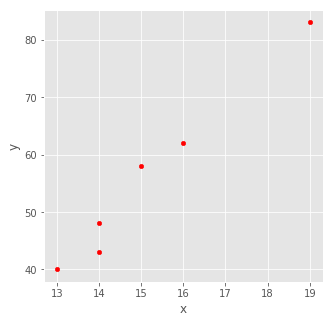

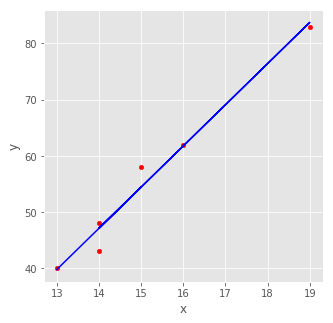

In [57]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

data = {'x' : [13, 19, 16, 14, 15, 14],
            'y' : [40, 83, 62, 48, 58, 43]}

data = pd.DataFrame(data) # pandas.DataFrame 함수를 통해서 2차원의 수정 가능한 테이블 형태의 표 형태로 저장

data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='red') 
    # kind : 기본 선 이외의 여러 가지 플롯 스타일
    # x,y 파라미터 : 가로와 세로에 표시할 데이터 지정
    # figsize : 플롯의 크기를 조정
    # color : 원하는 생상
    
# 데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y =data["y"])
prediction = linear_regression.predict(X=pd.DataFrame(data["x"]))
print("a value : ", linear_regression.intercept_)
print("a value : ", linear_regression.coef_) # 선형회귀모델의 b계수를 출력
residuals = data['y'] - prediction
residuals.describe()

# 적합도 검증
SSE = (residuals ** 2).sum()
SST = ((data['y']-data['y'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared : ', R_squared) # 출력값 : 0.975, x값이 y값에 많은 영향

# 플롯 나타내기
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='red') 

# plot regression line
plt.plot(data["x"], prediction, color="blue") # 에러뜨는데..

# 생성된 회귀분석 모델의 성능평가
from sklearn.metrics import mean_squared_error
print("SCORE :", linear_regression.score(X=pd.DataFrame(data["x"]), y=data["y"]))
print("Mean_Squared_Error : ", mean_squared_error(prediction, data["y"]))
print("RMSE : ", mean_squared_error(prediction, data['y'])**0.5)


In [33]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print("키값 : ", boston_house_prices.keys())
print("데이터에 대한 전체 행, 열의 길이값(data.shape) : ", boston_house_prices.data.shape)
print("컬럼 이름(feature_names) : ", boston_house_prices.feature_names)
print("변수에 저장된 데이터의 세부적인 내용을 저장하고 있는 DESCR 출력 : ", boston_house_prices.DESCR)
data_frame.tail()

키값 :  dict_keys(['data', 'target', 'feature_names', 'DESCR'])
데이터에 대한 전체 행, 열의 길이값(data.shape) :  (506, 13)
컬럼 이름(feature_names) :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
변수에 저장된 데이터의 세부적인 내용을 저장하고 있는 DESCR 출력 :  Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


a value :  -34.6706207764
b value :  [ 9.10210898]
R 결정계수 :  0.483525455991
=====================성능평가======================
score :  0.483525455991
Mean_Squared_Error :  43.6005517712
RMSE :  353.300740782


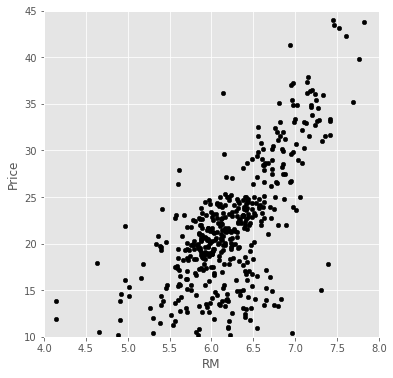

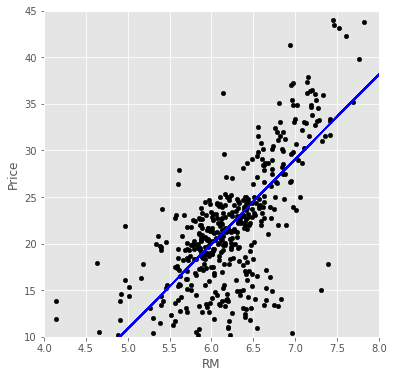

In [61]:
# 데이터 프레임 정제
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail() # 마지막 5개의 데이터 출력

data_frame.columns = boston_house_prices.feature_names
data_frame['Price'] = boston_house_prices.target # Price 칼럼이 추가된다.
data_frame.plot(kind='scatter', x='RM', y='Price', figsize=(6,6), color='black', xlim=(4, 8), ylim=(10, 45))

# 데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data_frame["RM"]), y=data_frame['Price'])
prediction = linear_regression.predict(X=pd.DataFrame(data_frame["RM"]))
print("a value : ", linear_regression.intercept_)
print('b value : ', linear_regression.coef_)
residuals = data_frame["Price"] - prediction # 잔차
residuals.describe()

# 결정계수
SSE = (residuals ** 2).sum()
SST = ((data_frame["Price"] - data_frame["Price"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print("R 결정계수 : ", R_squared) # 출력값 : 0.483 

# 예측한 값을 이용해서 선형회귀선(플롯) 나타내기
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="black", xlim=(4,8), ylim=(10, 45))

# Plot regression line
plt.plot(data_frame["RM"], prediction, color="blue")

# 성능평가
print("=====================성능평가======================")
print("score : ", linear_regression.score(X=pd.DataFrame(data_frame["RM"]), y=data_frame["Price"]))
print("Mean_Squared_Error : ", mean_squared_error(prediction, data_frame["Price"]))
print("RMSE : ", mean_squared_error(prediction, data_frame["Price"] ** 0.5 )) # 루트 씌워줘야 하니까 ** 0.5

In [87]:
data = {'x1' : [13, 18, 17, 20, 22, 21],
            'x2' : [9, 7, 17, 11, 8, 10],
            'y' : [20, 22, 30, 27, 35, 32]}

data = pd.DataFrame(data)
X=data[['x1','x2']]
y=data['y']
data

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X), y=y)
prediction = linear_regression.predict(X=pd.DataFrame(X))
print('a value : ' , linear_regression.intercept_)
print('b value : ' , linear_regression.coef_) 

# 적합도 검증
print("==============적합도검증==============")

residuals = y-prediction
residuals.describe()

SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE / SST)
print("R 결정계수 : ", R_squared)

a value :  -7.35920177384
b value :  [ 1.5443459   0.62472284]
==============적합도검증==============
R 결정계수 :  0.796944017669


In [96]:
# 보스턴 데이터 실습
X = pd.DataFrame(boston_house_prices.data)
X.tail()

# 잔차
print("=====잔차 구하기====")
residuals = y - prediction # 실제값 y에서 prediction을 뺀다
residuals.describe()

# 일단 건너 뜀.

=====잔차 구하기====
=====적합도 검증====
R_squared :  0.796944017669
=====적합도 검증====
